## Setup

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

The data: Protein quantity measurements of brain tissue samples from multiple regions.

Here we read in the data, store a feature for visualization later, and drop non-numeric features from the dataset.

In [70]:
data = pd.read_csv('ProteinAndPathologyQuantifications.csv')
structures = data['structure_acronym']

In [71]:
clean_data = data.drop(columns=['donor_id', 'donor_name', 'structure_id', 'structure_acronym'])

## Pre-processing

Next, we replace NaN values with mean values and normalize the data.

In [72]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
clean_data = imp_mean.fit_transform(clean_data)

print(clean_data)

[[7.79282730e-05 2.35802722e-03 1.13707657e-03 ... 9.38000000e+00
  1.17800000e+01 5.23292251e+02]
 [6.28024529e-05 2.76219563e-03 1.27181308e-03 ... 8.10000000e+00
  4.50200000e+01 8.14938750e+01]
 [6.41346519e-05 3.46832366e-03 1.37873651e-02 ... 2.70000000e+01
  1.58200000e+01 4.70734514e+02]
 ...
 [6.63881638e-05 2.27534536e-03 6.33726487e-03 ... 2.19600000e+01
  6.00000000e-01 1.81375000e-01]
 [7.92516891e-04 4.38366336e-03 1.26577462e-03 ... 0.00000000e+00
  1.24600000e+01 2.05886650e+02]
 [7.92517323e-05 2.13531976e-03 1.35058218e-03 ... 8.82000000e+00
  9.50000000e+00 3.78056250e-01]]


In [73]:
scaler = StandardScaler()

clean_data = scaler.fit_transform(clean_data)

print(clean_data)

[[-0.18960178 -0.47869734 -0.82037204 ... -0.24277687 -0.24779252
   1.26252476]
 [-0.20076815 -0.38541831 -0.80927418 ... -0.26203924  2.60171979
  -0.8461383 ]
 [-0.19978468 -0.22244926  0.22159515 ...  0.02238156  0.09853809
   1.01167151]
 ...
 [-0.19812106 -0.49777969 -0.39204777 ... -0.05346398 -1.2062025
  -1.23423539]
 [ 0.33793089 -0.01119573 -0.80977155 ... -0.38393386 -0.18949925
  -0.25242301]
 [-0.18862476 -0.53009655 -0.8027862  ... -0.25120416 -0.44324644
  -1.23329665]]


##  PCA

Finally, we set-up our PCA model, fit it, and transform the data (embedd in low dimensional space)

In [74]:
pca = PCA(n_components=clean_data.shape[1])
# Fit our PCA model and transform the data (storing it in a seperate variable named 'transformed')

transformed = pca.fit_transform(clean_data)

print(transformed)

[[-1.84636379 -0.19577099 -0.35138683 ... -0.23530106 -0.03110726
  -0.05529197]
 [-2.693768   -0.30768813  1.89119119 ...  0.31156903 -0.2102272
  -0.02991932]
 [-0.76429176  1.17632935  0.02828194 ... -0.22458262 -0.16531745
  -0.10755526]
 ...
 [ 2.10268843 -2.87046926  0.02370064 ...  0.63239358 -0.08516008
  -0.17175504]
 [-1.26830071 -0.44033474 -1.37281276 ...  0.52150742 -0.22795419
  -0.04222564]
 [-1.55847393 -1.5953895  -0.47989638 ...  0.04468509  0.09488871
   0.01361185]]


We can see how much variance each PC explains

In [75]:
# Display the explained variance ratio of the first 5 PCs
print(pca.explained_variance_ratio_[:5])

[0.19729818 0.11293478 0.06357026 0.06211117 0.05287326]


## Plots

Here we see that two main clusters are apparent in this low dimensional space

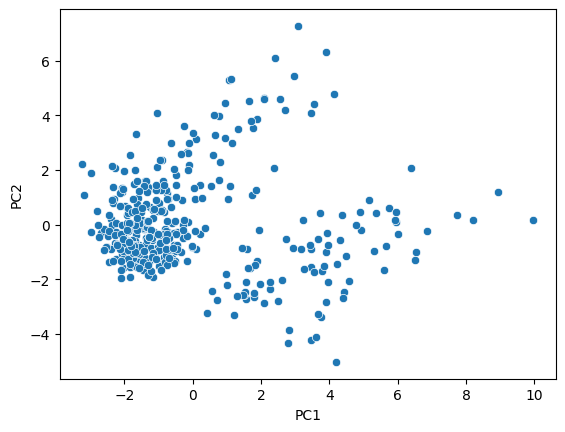

In [76]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

After coloring by brain region, we can see that the islands represent the difference between the hippocampus and other brain regions

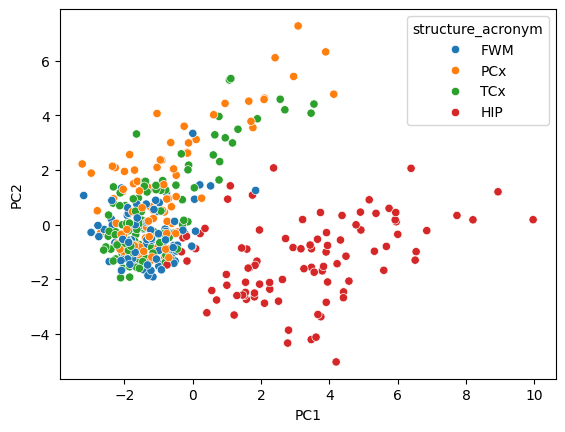

In [77]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=structures)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

We can look at other PCs as well. There are outliers that become apparent here!

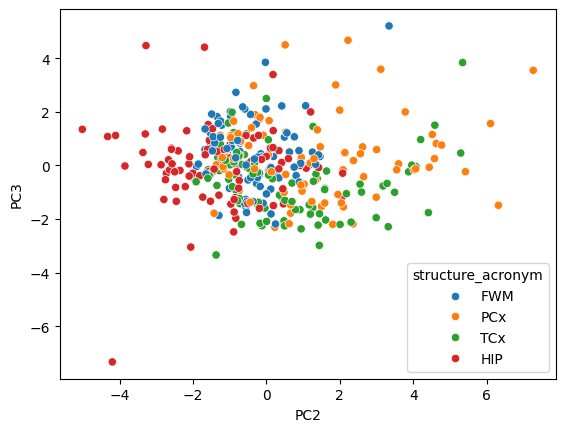

In [78]:
sns.scatterplot(x=transformed[:,1], y=transformed[:,2], hue=structures)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()